In [1]:
import psycopg2 as pg2
import pandas as pd

con = pg2.connect(host='this_postgres', user='postgres', database='postgres')
con.autocommit = True
cur = con.cursor()

def select(sql):
    return pd.read_sql(sql,con)

In [2]:
sql = '''select * from sales t limit 10'''

In [3]:
select(sql)

,index,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
sql = '''
drop table if exists users;
create table users as
select t.customerid, min(date_trunc('month',t.invoicedate)) as reg_month  from sales t 
where t.customerid is not null
group by t.customerid'''

In [5]:
cur.execute(sql)

In [6]:
sql = '''select count(*) from users t'''

In [7]:
select(sql)

,count
0,4372


In [8]:
sql = '''select * from d_date t limit 10'''

In [9]:
select(sql)

,date_dim_id,date_actual,epoch,day_suffix,day_name,day_of_week,day_of_month,day_of_quarter,day_of_year,week_of_month,...,last_day_of_week,first_day_of_month,last_day_of_month,first_day_of_quarter,last_day_of_quarter,first_day_of_year,last_day_of_year,mmyyyy,mmddyyyy,weekend_indr
0,19700101,1970-01-01,0,1st,Thursday,4,1,1,1,1,...,1970-01-04,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01011970,False
1,19700102,1970-01-02,86400,2nd,Friday,5,2,2,2,1,...,1970-01-04,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01021970,False
2,19700103,1970-01-03,172800,3rd,Saturday,6,3,3,3,1,...,1970-01-04,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01031970,True
3,19700104,1970-01-04,259200,4th,Sunday,7,4,4,4,1,...,1970-01-04,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01041970,True
4,19700105,1970-01-05,345600,5th,Monday,1,5,5,5,1,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01051970,False
5,19700106,1970-01-06,432000,6th,Tuesday,2,6,6,6,1,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01061970,False
6,19700107,1970-01-07,518400,7th,Wednesday,3,7,7,7,1,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01071970,False
7,19700108,1970-01-08,604800,8th,Thursday,4,8,8,8,2,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01081970,False
8,19700109,1970-01-09,691200,9th,Friday,5,9,9,9,2,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01091970,False
9,19700110,1970-01-10,777600,10th,Saturday,6,10,10,10,2,...,1970-01-11,1970-01-01,1970-01-31,1970-01-01,1970-03-31,1970-01-01,1970-12-31,011970,01101970,True


In [10]:
sql = '''select distinct t.first_day_of_month from d_date t 
where t.date_actual between (select min(date_trunc('month',t.invoicedate))  from sales t)
and (select max(date_trunc('month',t.invoicedate))  from sales t )
'''

In [11]:
select(sql)

,first_day_of_month
0,2011-07-01
1,2011-04-01
2,2011-10-01
3,2011-03-01
4,2010-12-01
5,2011-05-01
6,2011-08-01
7,2011-11-01
8,2011-12-01
9,2011-09-01


In [12]:
4372 * 13

56836

In [13]:
sql = '''
drop table if exists user_month_1;
create table user_month_1 as 
select * from users t 
join (select distinct t.first_day_of_month as month from d_date t 
where t.date_actual between (select min(date_trunc('month',t.invoicedate))  from sales t)
and (select max(date_trunc('month',t.invoicedate))  from sales t )) c
on t.reg_month <= c.month
order by c.month
'''

In [14]:
cur.execute(sql)

In [15]:
sql = '''select * from user_month_1 t limit 10'''

In [16]:
select(sql)

,customerid,reg_month,month
0,14506.0,2010-12-01,2010-12-01
1,17191.0,2010-12-01,2010-12-01
2,15468.0,2010-12-01,2010-12-01
3,17404.0,2010-12-01,2010-12-01
4,17181.0,2010-12-01,2010-12-01
5,14606.0,2010-12-01,2010-12-01
6,13496.0,2010-12-01,2010-12-01
7,12708.0,2010-12-01,2010-12-01
8,14709.0,2010-12-01,2010-12-01
9,18037.0,2010-12-01,2010-12-01


In [17]:
sql = '''
drop table if exists sales_month_agg;
create table sales_month_agg as

select t.customerid, date_trunc('month',t.invoicedate) as month,
count(distinct t.invoiceno) as invoice_cnt,
sum(t.unitprice) as unitprice_sum

from sales t
--where t.customerid = 12727.0
group by t.customerid, date_trunc('month',t.invoicedate)
order by date_trunc('month',t.invoicedate)
'''

In [18]:
cur.execute(sql)

In [19]:
sql = '''select * from sales_month_agg t limit 10'''

In [20]:
select(sql)

,customerid,month,invoice_cnt,unitprice_sum
0,12347.0,2010-12-01,1,89.59
1,12348.0,2010-12-01,1,49.60
2,12370.0,2010-12-01,2,263.38
3,12377.0,2010-12-01,1,90.57
4,12383.0,2010-12-01,1,49.03
5,12386.0,2010-12-01,1,21.81
6,12395.0,2010-12-01,2,105.09
7,12417.0,2010-12-01,1,77.04
8,12423.0,2010-12-01,1,42.19
9,12427.0,2010-12-01,2,67.95


In [21]:
sql = '''
drop table if exists sales_month;
create table sales_month as
select 

t.*,
s.invoice_cnt,
s.unitprice_sum,
1 as customer,
case when s.invoice_cnt > 0 then 1 else 0 end as active




from user_month_1 t 

left join sales_month_agg s on t.customerid = s.customerid and
t.month = s.month

'''

In [22]:
cur.execute(sql)

In [23]:
sql = '''select * from sales_month t
where t.customerid = 12347.0
order by t.month'''

In [24]:
select(sql)

,customerid,reg_month,month,invoice_cnt,unitprice_sum,customer,active
0,12347.0,2010-12-01,2010-12-01,1.0,89.59,1,1
1,12347.0,2010-12-01,2011-01-01,1.0,73.17,1,1
2,12347.0,2010-12-01,2011-02-01,NaN,NaN,1,0
3,12347.0,2010-12-01,2011-03-01,NaN,NaN,1,0
4,12347.0,2010-12-01,2011-04-01,1.0,62.29,1,1
5,12347.0,2010-12-01,2011-05-01,NaN,NaN,1,0
6,12347.0,2010-12-01,2011-06-01,1.0,53.62,1,1
7,12347.0,2010-12-01,2011-07-01,NaN,NaN,1,0
8,12347.0,2010-12-01,2011-08-01,1.0,68.24,1,1
9,12347.0,2010-12-01,2011-09-01,NaN,NaN,1,0


In [25]:
sql = '''select t.month, count(distinct t.customerid), count(1) from sales_month t
group by t.month
order by t.month'''

In [26]:
select(sql)

,month,count,count
0,2010-12-01,948,948
1,2011-01-01,1369,1369
2,2011-02-01,1749,1749
3,2011-03-01,2189,2189
4,2011-04-01,2488,2488
5,2011-05-01,2767,2767
6,2011-06-01,3002,3002
7,2011-07-01,3193,3193
8,2011-08-01,3360,3360
9,2011-09-01,3658,3658


In [27]:
sql = '''select t.month, sum(t.customer) as customer,
sum(t.invoice_cnt) as invoice,
sum(t.unitprice_sum) as revenue,

sum(t.active) as active,

sum(t.active) * 1.0 / sum(t.customer) as active_pct


from sales_month t 
group by t.month
order by t.month'''

In [28]:
df = select(sql)

In [29]:
df

,month,customer,invoice,revenue,active,active_pct
0,2010-12-01,948,1708.0,86057.190,948,1.000000
1,2011-01-01,1369,1236.0,73202.320,783,0.571950
2,2011-02-01,1749,1202.0,67529.430,798,0.456261
3,2011-03-01,2189,1619.0,96183.240,1020,0.465966
4,2011-04-01,2488,1384.0,91117.721,899,0.361334
5,2011-05-01,2767,1849.0,125537.660,1079,0.389953
6,2011-06-01,3002,1707.0,129301.450,1051,0.350100
7,2011-07-01,3193,1593.0,92754.521,993,0.310993
8,2011-08-01,3360,1544.0,88126.750,980,0.291667
9,2011-09-01,3658,2078.0,126029.422,1302,0.355932


In [30]:
%matplotlib inline

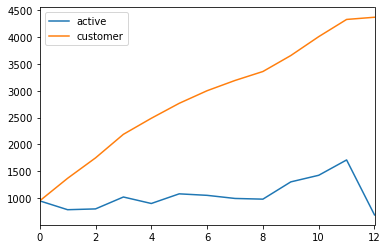

In [31]:
df[['active','customer']].plot()

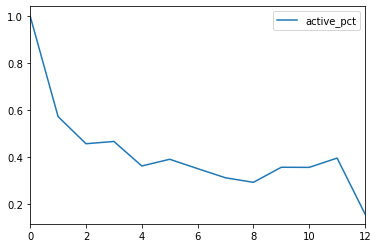

In [32]:
df[['active_pct']].plot()